<a href="https://colab.research.google.com/github/Liang130520/OpenCV/blob/main/OpenCV_classs1020_5_%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install tesseract-ocr
!pip install pytesseract

In [ ]:
" 文字辨識 "
# 辨識結果=pt.image_to_string(圖片變數, 語言包名稱)
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import IPython.display as dp
import pytesseract as pt

m1 = cv2.imread("3.jpg", 1)
m2 = cv2.inRange(m1, (0, 0, 0), (230, 230, 230))
# cv2_imshow(m2)
m2 = cv2.dilate(m2, np.ones((35, 35)))
cv2_imshow(m2)
# m3 = cv2.inRange(m1, (0, 0, 0), (30, 30, 30))
p, t = cv2.findContours(m2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for i in range(0, len(p), 1):
  x, y , w, h = cv2.boundingRect(p[i])
  cv2.rectangle(m1, (x,y), (x+w, y+h), (0, 0, 255), 2)
  cv2_imshow(m1)
  # cv2_imshow(m1[y:y+h,x:x+w])
  # 辨識結果=pt.image_to_string(圖片變數, 語言包名稱)
  d= pt.image_to_string(m1[y:y+h,x:x+w],"eng")
  print(d)

# cv2_imshow(m1)



In [ ]:
" 語言包載入 "
!python training.py

In [ ]:
" 文字辨識 "
# 辨識結果=pt.image_to_string(圖片變數, 語言包名稱)
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import IPython.display as dp
import pytesseract as pt

m1 = cv2.imread("myfont.png", 1)
m2 = cv2.inRange(m1, (0, 0, 0), (100, 255, 255))
# cv2_imshow(m2)
m2 = cv2.dilate(m2, np.ones((30, 30)))
# cv2_imshow(m2)
# m3 = cv2.inRange(m1, (0, 0, 0), (30, 30, 30))
p, t = cv2.findContours(m2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for i in range(0, len(p), 1):
  x, y , w, h = cv2.boundingRect(p[i])
  cv2.rectangle(m1, (x,y), (x+w, y+h), (0, 0, 255), 2)
  
  d= pt.image_to_string(m1[y:y+h,x:x+w],"myfont")
  cv2_imshow(m1)
print(d)
  # cv2_imshow(m1[y:y+h,x:x+w])
  # 辨識結果=pt.image_to_string(圖片變數, 語言包名稱)

# cv2_imshow(m1)



In [ ]:
!apt install libzbar-dev
!pip install pyzbar

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import IPython.display as dp
import pytesseract as pt
from pyzbar import pyzbar

m1 = cv2.imread("p3.png",-1)
data = pyzbar.decode(m1)
# print(data)
for i in range(0, len(data)):
  x, y , w, h = data[i].rect
  cv2.rectangle(m1, (x,y), (x+w, y+h), (0, 0, 255), 2)
  print(data[i].type)
  print(data[i].rect)
  try:
    print(data[i].data.decode("utf-8").encode("sjis").decode("utf-8"))
  except:
    print(data[i].data.decode("utf-8"))  
  print("=========================================================")

cv2_imshow(m1)

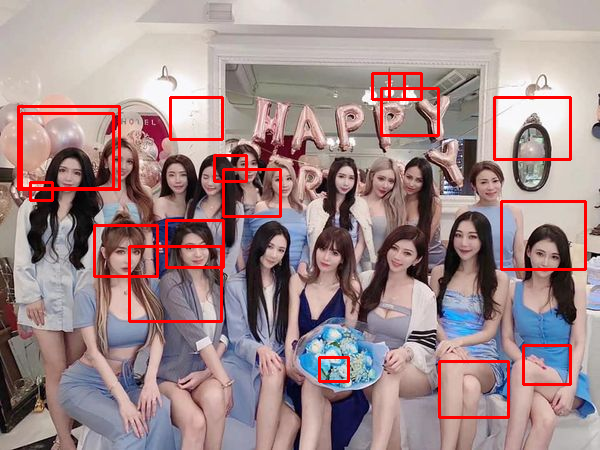

In [148]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import IPython.display as dp
import pytesseract as pt
from pyzbar import pyzbar

m1 = cv2.imread("faces4.jpg",-1)
# w =2000
# h = int((m1).shape[1] / (m1.shape[0]/w)) # 設 h 為高, w 為寬, 依同長寬比計算, h * 圖長 = w * 圖高
# # 須注意: 除法會有浮點數, 需轉換為整數, 任意方式皆可
# m1_resize = cv2.resize(m1, (w, h)) # 以(寬, 高)進行縮小放大
# cv2_imshow(m1_resize)

p1 = cv2.CascadeClassifier("haarcascade_upperbody.xml")
data = p1.detectMultiScale(m1,minNeighbors=0,minSize=(3,3))
for x, y , w, h in data:
  cv2.rectangle(m1, (x,y), (x+w, y+h), (0, 0, 255), 2)
cv2_imshow(m1)

In [ ]:
" Colab 產生莫名error解法 "
import os
os.kill(os.getpid(), 9)